<a href="https://colab.research.google.com/github/reban87/Disaster-Management-and-Geovisualization-with-NLP/blob/main/data_preparation/social_media_post_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Create a dataframe to create a dataset
- tweets
- facebook
- instagram
- news head line

In [117]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [ ]:
# Define the function to extract desired columns
def extract_columns(df):
    desired_columns = ['Title', 'Hazard', 'Incident on', 'Province', 'District', 'Municipality', 'Ward']
    available_columns = set(df.columns)
    return df[available_columns.intersection(desired_columns)]

# Dictionary of input paths
input_paths = {
    'twitter': '/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/twitter.csv',
    'facebook': '/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/facebook.csv',
    'instagram': '/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/instagram.csv'
}

# Create an empty dictionary to store DataFrames
dataframes = {}

# Loop through input paths
for platform, input_path in input_paths.items():
    # Read the dataset
    df = pd.read_csv(input_path)

    # Extract desired columns using the function
    subset_df = extract_columns(df)

    # Use the platform name as the key in the dictionary
    dataframes[platform] = subset_df

# Access the DataFrames using keys
df_twitter = dataframes['twitter']
df_facebook = dataframes['facebook']
df_instagram = dataframes['instagram']

# Print the DataFrames
print("Twitter DataFrame:")
print(df_twitter)

print("\nFacebook DataFrame:")
print(df_facebook)

print("\nInstagram DataFrame:")
print(df_instagram)


In [ ]:
# df_twitter
# df_facebook
# df_instagram

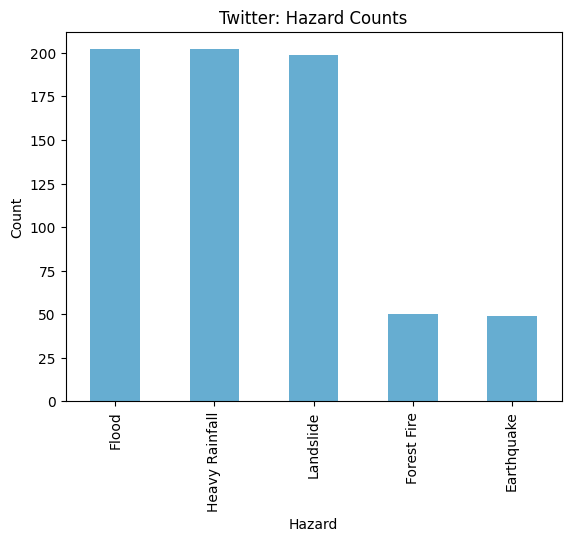

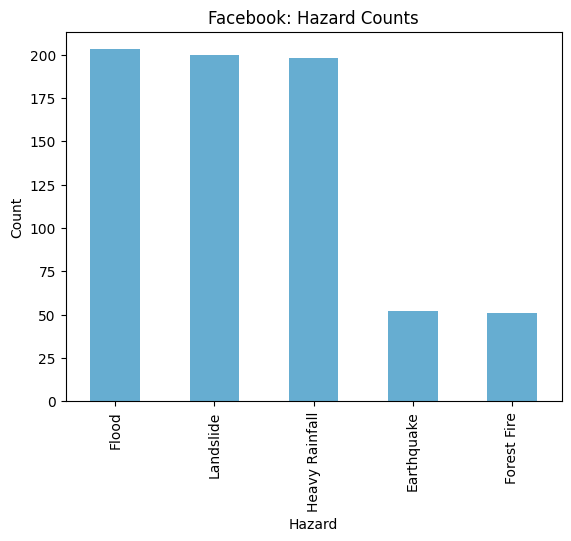

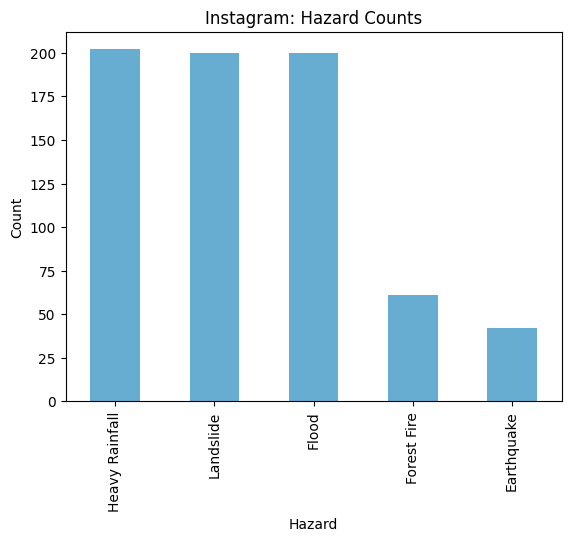

In [119]:
import matplotlib.pyplot as plt

def visualize_disaster(hazard_lists):
    for df_name, df in hazard_lists:
        # Count the occurrences of each hazard in the 'Hazard' column
        hazard_counts = df['Hazard'].value_counts()

        # Plot the category counts
        hazard_counts.plot(kind='bar', alpha = 0.7, color = '#258BBE')

        # Set the plot labels
        plt.xlabel('Hazard')
        plt.ylabel('Count')
        plt.title(f'{df_name}: Hazard Counts')

        # plt.legend()
        plt.xticks(range(len(hazard_counts)), hazard_counts.index)
        # Display the plot
        plt.show()


hazard_lists = [('Twitter', df_twitter), ('Facebook', df_facebook), ('Instagram', df_instagram)]

# Call the function to visualize hazard counts for each DataFrame
visualize_disaster(hazard_lists)


In [99]:
#  !pip install --upgrade openai
#!pip install typing_extensions==4.7.1 --upgrade

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.7.1 which is incompatible.


 🧨ImportError: cannot import name ‘Iterator’ from ‘typing_extensions’ (/usr/local/lib/python3.10/dist-packages/typing_extensions.py) Run Below code

In [104]:
# %%writefile /usr/local/lib/python3.10/dist-packages/openai/_utils/_streams.py
# from typing import Any
# from typing_extensions import AsyncIterator
# from typing import Iterator # import Iterator from the correct library

# def consume_sync_iterator(iterator: Iterator[Any]) -> None:
#     for _ in iterator:
#         ...

# async def consume_async_iterator(iterator: AsyncIterator[Any]) -> None:
#     async for _ in iterator:
#         ...

In [120]:
import os
import time
import openai
from openai import OpenAI

In [121]:
output_path = '/content/drive/MyDrive/master thesis on NLP/Colab Notebook/Dataset/disaster_data/dataset_015_to_024_bipad/Social Media Types/instagram_dataset.csv'

In [122]:
df_instagram

,Ward,Province,Municipality,Hazard,District,Incident on,Title
0,15,Gandaki,Madhyabindu,Earthquake,Nawalparasi East,4/25/2015,Earthquake at Madhyabindu Municipality-15
1,14,Lumbini,Tillotama,Earthquake,Rupandehi,4/25/2015,Earthquake at Tillotama Municipality-14
2,8,Lumbini,Buddhabhumi,Earthquake,Kapilbastu,4/25/2015,Earthquake at Buddhabhumi Municipality-8
3,1,Lumbini,Mathagadhi,Earthquake,Palpa,4/25/2015,Earthquake at Mathagadhi Rural Municipality-1
4,7,Lumbini,Bhumekasthan,Earthquake,Arghakhanchi,4/25/2015,Earthquake at Bhumekasthan Municipality-7
...,...,...,...,...,...,...,...
700,6,Koshi,Menchayam,Heavy Rainfall,Terhathum,9/23/2020,"Heavy Rainfall at Morahang, Menchayam Rural Mu..."
701,4,Koshi,Mahalaxmi,Heavy Rainfall,Dhankuta,9/23/2020,Heavy Rainfall at Mahalaxmi Municipality-4
702,9,Koshi,Mahalaxmi,Heavy Rainfall,Dhankuta,9/23/2020,"Heavy Rainfall at Sirise, Mahalaxmi Municipali..."
703,2,Lumbini,Rainadevi Chhahara,Heavy Rainfall,Palpa,9/23/2020,"Heavy Rainfall at Somadi, Rainadevi Chhahara R..."


In [123]:
# Set up OpenAI API credentials
api_key = 'API_KEY'
client = OpenAI(api_key = api_key)
# Select only the first 100 rows from the DataFrame
# df = df[100:199]

# Initialize counters
total_tokens = 0
total_cost = 0.0
total_processing_time = 0.0

# Generate news articles using OpenAI API
with tqdm(total=len(df_instagram)) as pbar:
    for index, row in df_instagram.iterrows():
        title = row['Title']
        hazard = row['Hazard']
        incident_on = row['Incident on']
        province = row['Province']
        district = row['District']
        municipality = row['Municipality']
        ward = row['Ward']

        # Construct the prompt for generating the news article
        # prompt_article = f"You need to generate a news article not more than 60 words. Use the following information:\n\nTitle: {title}\nHazard: {hazard}\nIncident on: {incident_on}\nProvince: {province}\nDistrict: {district}\nMunicipality: {municipality}\nWard: {ward}\n\nAI:"
        prompt = f"You are a social media post generator bot. You create a natural hazard or disaster related social media posts. Please generate very short instagram post. Please note you don't have to give image. Use the following information:\n\nTitle: {title}\nHazard: {hazard}\nIncident on: {incident_on}\nProvince: {province}\nDistrict: {district}\nMunicipality: {municipality}\nWard: {ward}\n\nAI:"
        try:
            # Start the timer
            start_time = time.time()

            # Generate the news article using OpenAI API
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[
                    {
                    "role": "system",
                    "content": prompt
                    }
                ],
                temperature=0.56,
                max_tokens=256,
                top_p=1,
                frequency_penalty=0,
                presence_penalty=0
            )
            # Calculate the processing time
            processing_time = time.time() - start_time
            total_processing_time += processing_time

            # Extract the generated news article
            instagram_status = response.choices[0].message.content.strip()

            # Calculate the token usage and cost
            tokens_used = response.usage.total_tokens
            total_tokens += tokens_used
            cost_per_token = 0.0001 / 1000
            cost = tokens_used * cost_per_token
            total_cost += cost

            # Store the generated article in a new column in the DataFrame
            # df.loc[index, 'Article'] = article
            df_instagram.loc[index, 'instagram_status'] = instagram_status

            # Update the progress bar
            pbar.update(1)
            # time.sleep(20)
        except (openai.OpenAIError, ConnectionError) as e:
            # Handle OpenAI API errors or connection errors here
            # You can log the error, retry, or take any necessary action

            print(f"An error occurred: {str(e)}")
            print("Resuming from the last processed row...")

            # Update the progress bar to the last processed row
            pbar.update(index + 1)
            # time.sleep(20)
            # Break the loop to resume from the last processed row
            break

# Write the updated DataFrame with the generated articles to a new CSV file
df_instagram.to_csv(output_path, index=False)

# Print the token usage, total cost, and processing time
print(f"Total Tokens Used: {total_tokens}")
print(f"Total Cost: ${total_cost}")
print(f"Total Processing Time: {total_processing_time} seconds")


  0%|          | 0/705 [00:00<?, ?it/s]<ipython-input-123-58f51deef495>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instagram.loc[index, 'instagram_status'] = instagram_status
100%|██████████| 705/705 [22:04<00:00,  1.88s/it]

Total Tokens Used: 154917
Total Cost: $0.015491699999999988
Total Processing Time: 1322.783848285675 seconds
